## Classify Images using Kerasand Tensorflow

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os

### Load and preprocess data

In [16]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images =  train_images/255.0, test_images/255.0

In [18]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "dog",
    "deer",
    "frog",
    "horse",
    "ship",
    "truck",
]


model_path = "cifar19_cnn_model.h5"
if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
    print("Model loaded")
else:
  model = models.Sequential(
      [
          layers.Conv2D(32,(3,3), activation = "relu", input_shape = (32,32,3)),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(64,(3,3), activation = "relu"),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(64,(3,3), activation = "relu"),
          layers.Flatten(),
          layers.Dense(64, activation="relu"),
          layers.Dense(10),
      ]
  )

  model.compile(
      optimizer = "SGD",
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics = ["accuracy"],

  )

  model.fit(
      train_images,
      train_labels,
      epochs = 50,
      validation_data = (test_images, test_labels),

  )

  model.save(model_path)
  print("Model saved")



Model loaded


In [19]:
def classify_image(image):
  image_array = tf.expand_dims(image, 0)
  predictions = model.predict(image_array)
  predited_class = tf.argmax(predictions[0]).numpy()
  return class_names[predictions]

In [20]:
def show_predicted_image(image, true_label):
  predicted_label = classify_image(image)
  plt.figure()
  plt.imshow(image)
  plt.title(f"Predicted: {predicted_label}\n True: {class_names[true_label]}")
  plt.axis("off")
  plt.show()

In [21]:
def classify_image(image):
  image_array = tf.expand_dims(image, 0)
  predictions = model.predict(image_array)
  predicted_class = tf.argmax(predictions[0]).numpy()
  return predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


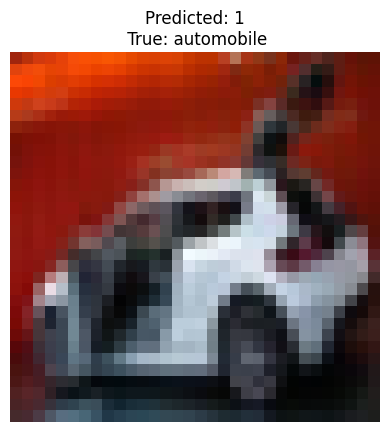

In [22]:
class_pred = classify_image(test_images[6])
show_predicted_image(test_images[6], class_pred)